In [46]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import pyreadr
import matplotlib.pyplot as plt

# Potential outcomes example using OLS regression modelling

The following is a python implementation of the fantastic description of potential outcomes framework of casual inference by https://solomonkurz.netlify.app/blog/2023-04-16-causal-inference-with-potential-outcomes-bootcamp/. The point of this notebook then is for learning potential outocmes framework using OLS regression modelling implemented in python instead of R.

The following data were curated by Solomon Kurz by taking the tabulated data in the original Horan & Johson (1971) paper. The data specifcally are from an experimental design as such the analysis below and claims of causlity are based on that precedenc (i.e we have the luxtury of -presumably well applied- randomisation). 

Horan & Johnson (1971) experiemnt was based on investigating the premack principle (a theory of reinforcement that states that a less desirable behavior can be reinforced by the opportunity to engage in a more desirable behavior) in female weight loss. Speciifcally, 80 women (defined as 20 to 30% overweight) were randomly assigned to one of four experimental conditions (delayed, placebo, scheduled experiemental). Body weight measured in lb's was the dependent varaible of interest. For the analysis here only the delayed and experimental group have been kept and stored at https://github.com/ASKurz/blogdown/tree/main/content/blog/2023-04-12-boost-your-power-with-baseline-covariates/data.

In [22]:
# Uncomment url and dst_path_again if dataset is lost from disk.
# url = "https://github.com/ASKurz/blogdown/blob/main/content/blog/2023-04-12-boost-your-power-with-baseline-covariates/data/horan1971.rda?raw=true"
# Linux directory path to datset
dst_path = "/home/harrison/Desktop/gitHubRepos/Datasets/horan1971.rda"
# dst_path_again = pyreadr.download_file(url, dst_path)

# Use pyreadr to get in the rda file.
df = pyreadr.read_r(dst_path)
# Extract to pandas dataframe for ease
df = df['horan1971']
df.head(2)

,sl,sn,treatment,pre,post,prec,delayed,experimental
0,a,1,delayed,149.50,149.0,-5.335366,1.0,0.0
1,b,2,delayed,131.25,130.0,-23.585366,1.0,0.0


Difference in means -2.4892344497607723


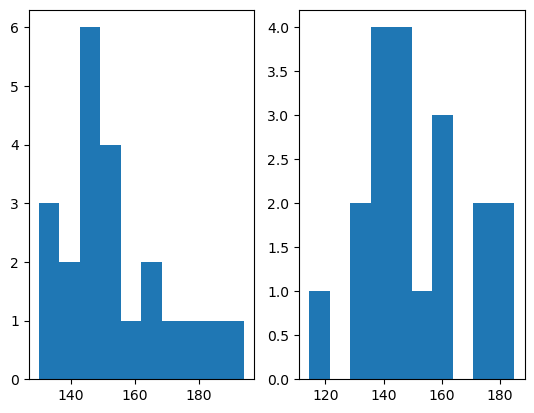

In [63]:
zeroI = df['experimental'] == 0
oneI = df['experimental'] == 1

fig, ax = plt.subplots(1, 2)
ax[0].hist(df['post'][zeroI]);
ax[1].hist(df['post'][oneI]);
print('Difference in means', np.mean(df['post'][oneI]) - np.mean(df['post'][zeroI]))

In [59]:
np.mean(df['post'][oneI]) - np.mean(df['post'][zeroI])

-2.4892344497607723

(120.0, 200.0)

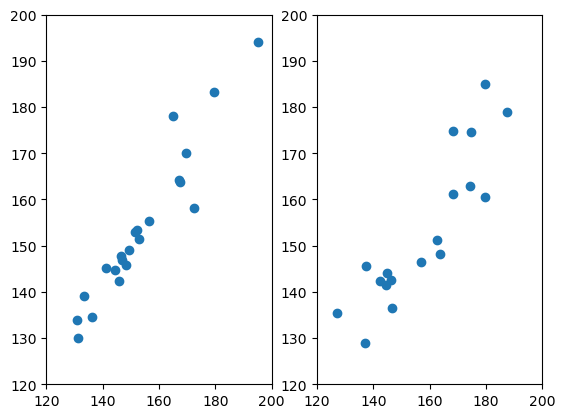

In [45]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(x = df['pre'][zeroI], y = df['post'][zeroI])
ax[1].scatter(x = df['pre'][oneI], y = df['post'][oneI])
ax[0].set_xlim(120,200)
ax[1].set_xlim(120,200)
ax[0].set_ylim(120,200)
ax[1].set_ylim(120,200)

In [49]:
# Fit ordinary least square estimator regression (ANOVA)
XAN = df['experimental']
XAN = sm.add_constant(XAN)
yAN = df['post']
ANmodel = sm.OLS(yAN, XAN)
ANresults = ANmodel.fit()
print(ANresults.summary())
print('Residual standard error', np.sqrt(ANresults.scale))

                            OLS Regression Results                            
Dep. Variable:                   post   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.2127
Date:                Mon, 17 Jul 2023   Prob (F-statistic):              0.647
Time:                        22:30:58   Log-Likelihood:                -173.87
No. Observations:                  41   AIC:                             351.7
Df Residuals:                      39   BIC:                             355.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          153.8182      3.674     41.864   

297.00395656974604

In [48]:
# Fit ordinary least square estimator regression (ANCOVA)
XAC = df[['experimental', 'prec']]
XAC = sm.add_constant(XAC)
yAC = df['post']
ACmodel = sm.OLS(yAC, XAC)
ACresults = ACmodel.fit()
print(ACresults.summary())
print('Residual standard error', np.sqrt(ACresults.scale))

                            OLS Regression Results                            
Dep. Variable:                   post   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     124.1
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           2.18e-17
Time:                        22:30:56   Log-Likelihood:                -132.59
No. Observations:                  41   AIC:                             271.2
Df Residuals:                      38   BIC:                             276.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          154.7835      1.361    113.693   

The critical point to take away from the example above is that because the data analysed are from an experiment and that we are willing to accept that the experiment was conducted with proper randomisation the estimates from the OLS linear model then are unbiased causal effects in terms of ATE and CATE of the population parameters modelled here and the change in body weight measured in pounds. 

# References
Horan, J. J., & Johnson, R. G. (1971). Coverant conditioning through a self-management application of the Premack principle: Its effect on weight reduction. Journal of Behavior Therapy and Experimental Psychiatry, 2(4), 243-249.